Proj_2 Modelling

Load Libraries:

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline

pd.options.display.max_rows=2000
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Load Cleaned Source Files: 

In [9]:
# Reading in Cleaned csv's
train_new = pd.read_csv('../datasets/train_new.csv')
test_new = pd.read_csv('../datasets/test_new.csv')

In [10]:
train_new.shape, test_new.shape

((2051, 165), (879, 156))

In [37]:
test_new.dtypes

id                        int64
pid                       int64
ms_subclass               int64
lot_frontage              int64
lot_area                  int64
lot_shape                 int64
utilities                 int64
land_slope                int64
overall_qual              int64
overall_cond              int64
year_built                int64
year_remod_add            int64
mas_vnr_area              int64
exter_qual                int64
exter_cond                int64
bsmt_qual                 int64
bsmt_cond                 int64
bsmt_exposure             int64
bsmtfin_type_1            int64
bsmtfin_sf_1              int64
bsmtfin_type_2            int64
bsmtfin_sf_2              int64
bsmt_unf_sf               int64
total_bsmt_sf             int64
heating_qc                int64
electrical              float64
1st_flr_sf                int64
2nd_flr_sf                int64
low_qual_fin_sf           int64
gr_liv_area               int64
bsmt_full_bath            int64
bsmt_hal

In [36]:
test_new.drop(['alley', 'neighborhood','sale_type'], axis=1, inplace =True)


In [11]:
train_new.isnull().sum()    #All columns = zero null  

id                         0
pid                        0
ms_subclass                0
lot_frontage               0
lot_area                   0
alley                   1911
lot_shape                  0
utilities                  0
land_slope                 0
neighborhood               0
overall_qual               0
overall_cond               0
year_built                 0
year_remod_add             0
mas_vnr_area               0
exter_qual                 0
exter_cond                 0
bsmt_qual                  0
bsmt_cond                  0
bsmt_exposure              0
bsmtfin_type_1             0
bsmtfin_sf_1               0
bsmtfin_type_2             0
bsmtfin_sf_2               0
bsmt_unf_sf                0
total_bsmt_sf              0
heating_qc                 0
electrical                 0
1st_flr_sf                 0
2nd_flr_sf                 0
                        ... 
exterior_2nd_Plywood       0
exterior_2nd_Stone         0
exterior_2nd_Stucco        0
exterior_2nd_V

In [13]:
numerical_columns = train_new._get_numeric_data().columns
features = [col for col in numerical_columns if col != 'saleprice']

# initial split of X and y
X = train_new[features]
y = train_new['saleprice']

In [17]:
# Run test_split:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42)


Scandard Scaler (SS)

In [18]:
# instantiate StandardScaler for original features:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)


C:\Users\FCG\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\FCG\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\FCG\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


Linear Regression (LR)

In [19]:
lr = LinearRegression()
lr_overfit = LinearRegression()

lasso = LassoCV(max_iter=10000)
lasso_overfit = LassoCV(max_iter=10000)

r_alphas = np.logspace(0, 5, 200)
ridge = RidgeCV(alphas=r_alphas)
ridge_overfit = RidgeCV(alphas=r_alphas)

lr cross_val_score -1.916595254303178e+23
lr train r2 = 0.9164822740940237
lr test r2 = -3.347898403916816e+21


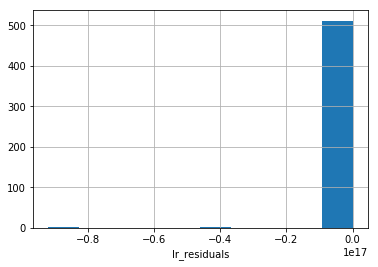

In [20]:
#LR Test
print("lr cross_val_score", cross_val_score(lr, X_train_sc, y_train, cv=3).mean())

lr.fit(X_train_sc, y_train)

print('lr train r2 =', lr.score(X_train_sc, y_train))

print('lr test r2 =', lr.score(X_test_sc, y_test))

lr_preds = lr.predict(X_test_sc)

lr_residuals = y_test - lr_preds

lr_residuals.hist()
plt.xlabel('lr_residuals');

Lasso Test

C:\Users\FCG\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\FCG\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\FCG\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\FCG\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. Th

lasso cross_val_score 0.7505034844412631
lasso train r2 = 0.8251216147160587
lasso test r2 = 0.8672311104401617


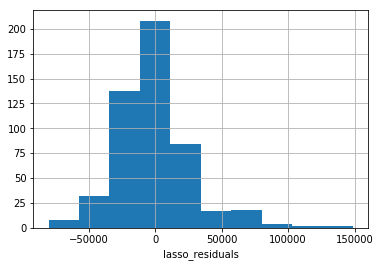

In [23]:
print("lasso cross_val_score", cross_val_score(lasso, X_train_sc, y_train, cv=3).mean())

lasso.fit(X_train_sc, y_train)

print('lasso train r2 =', lasso.score(X_train_sc, y_train))

print('lasso test r2 =', lasso.score(X_test_sc, y_test))

lasso_preds = lasso.predict(X_test_sc)

lasso_residuals = y_test - lasso_preds

lasso_residuals.hist()
plt.xlabel('lasso_residuals');

Ridge Test

ridge cross_val_score 0.7867088504124095
ridge train r2 = 0.867057210935511
ridge test r2 = 0.8693424594016553


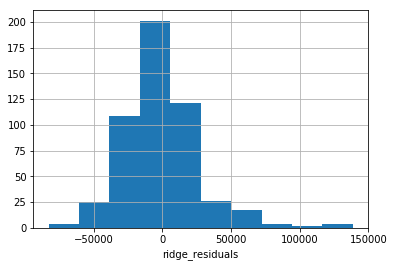

In [26]:
print("ridge cross_val_score", cross_val_score(ridge, X_train_sc, y_train, cv=3).mean())

ridge.fit(X_train_sc, y_train)

print('ridge train r2 =', ridge.score(X_train_sc, y_train))

print('ridge test r2 =', ridge.score(X_test_sc, y_test))

ridge_preds = ridge.predict(X_test_sc)

ridge_residuals = y_test - ridge_preds

ridge_residuals.hist()
plt.xlabel('ridge_residuals');

Predicting and Submitting

In [42]:
test_new.columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'lot_shape',
       'utilities', 'land_slope', 'overall_qual', 'overall_cond',
       ...
       'central_air_Y', 'garage_type_Attchd', 'garage_type_Basment',
       'garage_type_BuiltIn', 'garage_type_CarPort', 'garage_type_Detchd',
       'garage_type_NA', 'misc_feature_NA', 'misc_feature_Othr',
       'misc_feature_Shed'],
      dtype='object', length=153)

In [43]:
features

['id',
 'pid',
 'ms_subclass',
 'lot_frontage',
 'lot_area',
 'lot_shape',
 'utilities',
 'land_slope',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod_add',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating_qc',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'pool_qc',
 'fence',
 'misc_val',
 'mo_sold',
 'yr_sold',
 'ms_zoning_C (all)',
 'ms_zoning_FV',
 'ms_zoning_I (all)',
 'ms_zoning_R

In [45]:
#

In [44]:
#